# Model simulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="darkgrid")


In [2]:
from agent import run_experiment, Bandit, Agent
bandit = Bandit()

# Rescorla Wagner

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 5, 'noise': 0, 'bias': 0, 'Pav': 0}


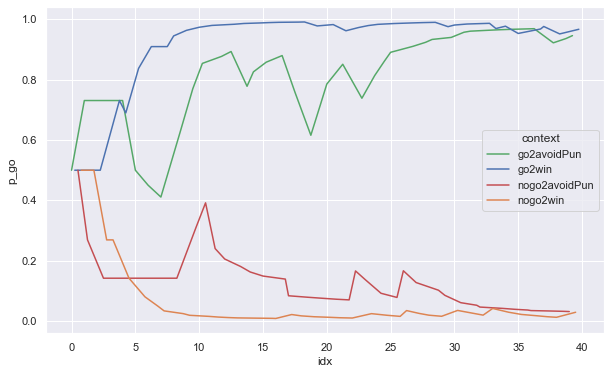

In [8]:
df = run_experiment(bandit, n_runs=40, params={'alpha': 0.2, 'beta': 5, 'noise': 0, 'bias': 0, 'Pav': 0})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

# Rescorla Wegner + Noise

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 5, 'noise': 0.3, 'bias': 0, 'Pav': 0}


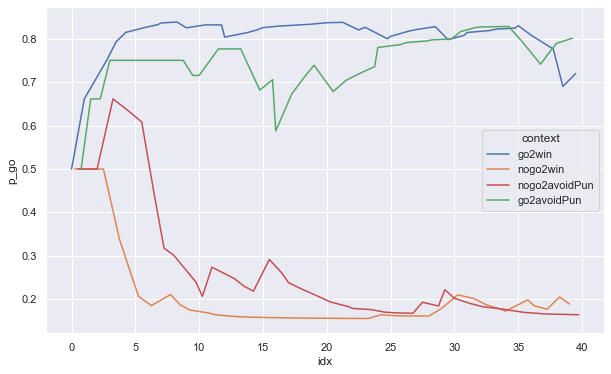

In [13]:
df = run_experiment(bandit, n_runs=40, params={'alpha': 0.2, 'beta': 5, 'noise': 0.3, 'bias': 0, 'Pav': 0})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

# Rescorla Wegner + Noise + Go Bias

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 5, 'noise': 0.1, 'bias': 1, 'Pav': 0}


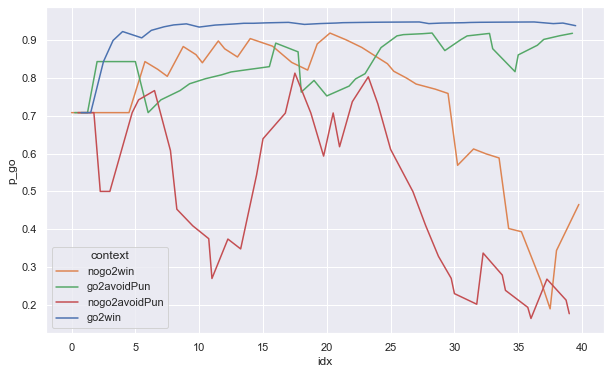

In [25]:
df = run_experiment(bandit, n_runs=40, params={'alpha': 0.2, 'beta': 5, 'noise': 0.1, 'bias': 1, 'Pav': 0})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

# Rescorla Wegner + Noise + Go Bias + Pavlovian Bias

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 5, 'noise': 0.1, 'bias': 0.2, 'Pav': 0.8}


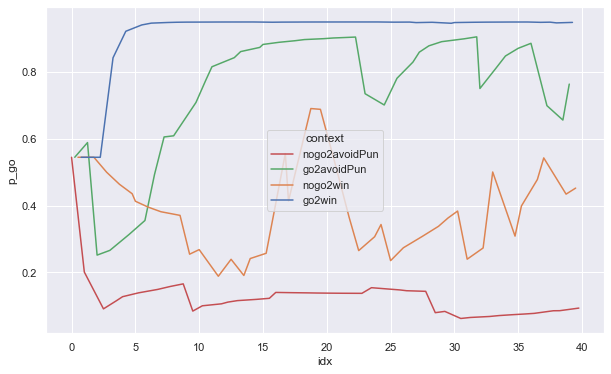

In [32]:
df = run_experiment(bandit, n_runs=40, params={'alpha': 0.2, 'beta': 5, 'noise': 0.1, 'bias': 0.2, 'Pav': 0.8})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)